In [59]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from config import weather_api_key 
from datetime import datetime

In [60]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [61]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [62]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [64]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acarau
Processing Record 2 of Set 1 | camopi
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | satitoa
City not found. Skipping...
Processing Record 7 of Set 1 | utiroa
City not found. Skipping...
Processing Record 8 of Set 1 | sangar
Processing Record 9 of Set 1 | trelew
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | zaragoza
Processing Record 19 of Set 1 | cayenne
Processing Record 20 of Set 1 | beidao
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | bathsh

Processing Record 37 of Set 4 | manado
Processing Record 38 of Set 4 | dawlatabad
Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | red deer
Processing Record 41 of Set 4 | ust-nera
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | makakilo city
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | haines junction
Processing Record 48 of Set 4 | ambulu
Processing Record 49 of Set 4 | tadine
Processing Record 50 of Set 4 | santarem
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | severnoye
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | tabuk
Processing Record 6 of Set 5 | bargal
City not found. Skipping...
Processing Record 7 of Set 5 | kalianget
Processing Record 8 of Set 5 | neco

Processing Record 24 of Set 8 | tiznit
Processing Record 25 of Set 8 | egvekinot
Processing Record 26 of Set 8 | korla
Processing Record 27 of Set 8 | wajir
Processing Record 28 of Set 8 | tigil
Processing Record 29 of Set 8 | kieta
Processing Record 30 of Set 8 | xuddur
Processing Record 31 of Set 8 | soyo
Processing Record 32 of Set 8 | neiafu
Processing Record 33 of Set 8 | atotonilco el grande
Processing Record 34 of Set 8 | moose factory
Processing Record 35 of Set 8 | araouane
Processing Record 36 of Set 8 | bosaso
Processing Record 37 of Set 8 | thunder bay
Processing Record 38 of Set 8 | dingle
Processing Record 39 of Set 8 | porbandar
Processing Record 40 of Set 8 | le port
Processing Record 41 of Set 8 | juifang
City not found. Skipping...
Processing Record 42 of Set 8 | zeya
Processing Record 43 of Set 8 | hailar
Processing Record 44 of Set 8 | weiden
Processing Record 45 of Set 8 | sur
Processing Record 46 of Set 8 | benoy
Processing Record 47 of Set 8 | blanquefort
Process

City not found. Skipping...
Processing Record 11 of Set 12 | walla walla
Processing Record 12 of Set 12 | phan rang
City not found. Skipping...
Processing Record 13 of Set 12 | yarovoye
Processing Record 14 of Set 12 | robertsport
Processing Record 15 of Set 12 | poli
Processing Record 16 of Set 12 | holme
Processing Record 17 of Set 12 | leningradskiy
Processing Record 18 of Set 12 | axim
Processing Record 19 of Set 12 | atambua
Processing Record 20 of Set 12 | abnub
Processing Record 21 of Set 12 | havelock
Processing Record 22 of Set 12 | svetlaya
Processing Record 23 of Set 12 | yulara
Processing Record 24 of Set 12 | bilma
Processing Record 25 of Set 12 | iralaya
Processing Record 26 of Set 12 | great yarmouth
Processing Record 27 of Set 12 | skjervoy
Processing Record 28 of Set 12 | temirtau
Processing Record 29 of Set 12 | truth or consequences
Processing Record 30 of Set 12 | avera
Processing Record 31 of Set 12 | talawdi
City not found. Skipping...
Processing Record 32 of Set 

In [68]:
len(city_data)

554

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acarau,-2.8856,-40.1200,86.97,61,43,18.79,BR,2021-10-19 17:48:20
1,Camopi,3.1655,-52.3158,87.22,52,96,2.42,GF,2021-10-19 17:48:20
2,Puerto Ayora,-0.7393,-90.3518,76.96,79,67,9.73,EC,2021-10-19 17:48:20
3,Severo-Kurilsk,50.6789,156.1250,39.96,85,84,12.53,RU,2021-10-19 17:48:21
4,Busselton,-33.6500,115.3333,53.10,74,100,23.47,AU,2021-10-19 17:44:43
5,Sangar,63.9242,127.4739,15.12,93,100,11.07,RU,2021-10-19 17:48:22
6,Trelew,-43.2490,-65.3051,79.20,21,34,8.32,AR,2021-10-19 17:44:47
7,Georgetown,5.4112,100.3354,78.89,93,20,5.99,MY,2021-10-19 17:45:00
8,Tasiilaq,65.6145,-37.6368,33.96,48,5,1.41,GL,2021-10-19 17:48:23
9,Rikitea,-23.1203,-134.9692,74.82,72,5,21.50,PF,2021-10-19 17:47:05


In [70]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [74]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acarau,BR,2021-10-19 17:48:20,-2.8856,-40.1200,86.97,61,43,18.79
1,Camopi,GF,2021-10-19 17:48:20,3.1655,-52.3158,87.22,52,96,2.42
2,Puerto Ayora,EC,2021-10-19 17:48:20,-0.7393,-90.3518,76.96,79,67,9.73
3,Severo-Kurilsk,RU,2021-10-19 17:48:21,50.6789,156.1250,39.96,85,84,12.53
4,Busselton,AU,2021-10-19 17:44:43,-33.6500,115.3333,53.10,74,100,23.47
5,Sangar,RU,2021-10-19 17:48:22,63.9242,127.4739,15.12,93,100,11.07
6,Trelew,AR,2021-10-19 17:44:47,-43.2490,-65.3051,79.20,21,34,8.32
7,Georgetown,MY,2021-10-19 17:45:00,5.4112,100.3354,78.89,93,20,5.99
8,Tasiilaq,GL,2021-10-19 17:48:23,65.6145,-37.6368,33.96,48,5,1.41
9,Rikitea,PF,2021-10-19 17:47:05,-23.1203,-134.9692,74.82,72,5,21.50


In [75]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [78]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

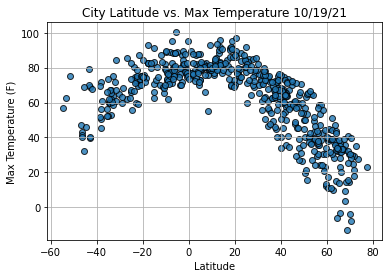

In [79]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

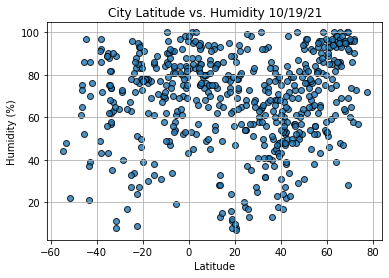

In [80]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

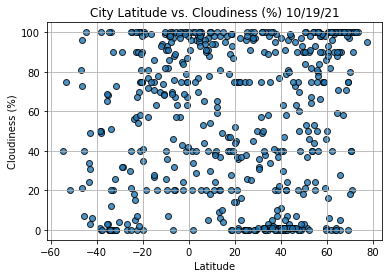

In [88]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

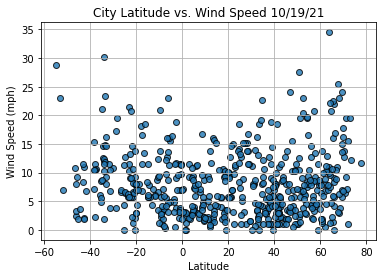

In [89]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()